In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt


url = "https://api.data.gov.hk/v2/filter?q=%7B%22resource%22%3A%22http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv%22%2C%22section%22%3A1%2C%22format%22%3A%22json%22%2C%22sorts%22%3A%5B%5B1%2C%22asc%22%5D%5D%7D"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

In [2]:
import json
raw_covid = json.loads(response.text)
raw_covid[0]

{'As of date': '01/02/2020',
 'As of time': '23:59',
 'Number of confirmed cases': 14,
 'Number of ruled out cases': 634,
 'Number of cases still hospitalised for investigation': 188,
 'Number of cases fulfilling the reporting criteria': 835,
 'Number of death cases': 0,
 'Number of discharge cases': 0,
 'Number of probable cases': 0,
 'Number of hospitalised cases in critical condition': ''}

In [3]:
import pandas as pd
df_covid = pd.DataFrame(raw_covid)
df_covid = df_covid[["As of date", "Number of confirmed cases", "Number of death cases"]]
df_covid.rename(columns={"As of date": "Date", "Number of confirmed cases": "Confirmed", "Number of death cases": "Death"}, inplace=True)
df_covid

,Date,Confirmed,Death
0,01/02/2020,14,0
1,01/03/2020,97,2
2,01/04/2020,737,4
3,01/05/2020,1039,4
4,01/06/2020,1087,4
...,...,...,...
245,31/01/2020,13,0
246,31/03/2020,680,4
247,31/05/2020,1084,4
248,31/07/2020,3272,27


In [4]:
df_covid.dtypes

Date         object
Confirmed     int64
Death         int64
dtype: object

In [5]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'], dayfirst=True)

In [6]:
df_covid.dtypes

Date         datetime64[ns]
Confirmed             int64
Death                 int64
dtype: object

In [7]:
df_covid.sort_values(by="Date", inplace=True)

In [8]:
df_covid.set_index("Date", inplace=True)

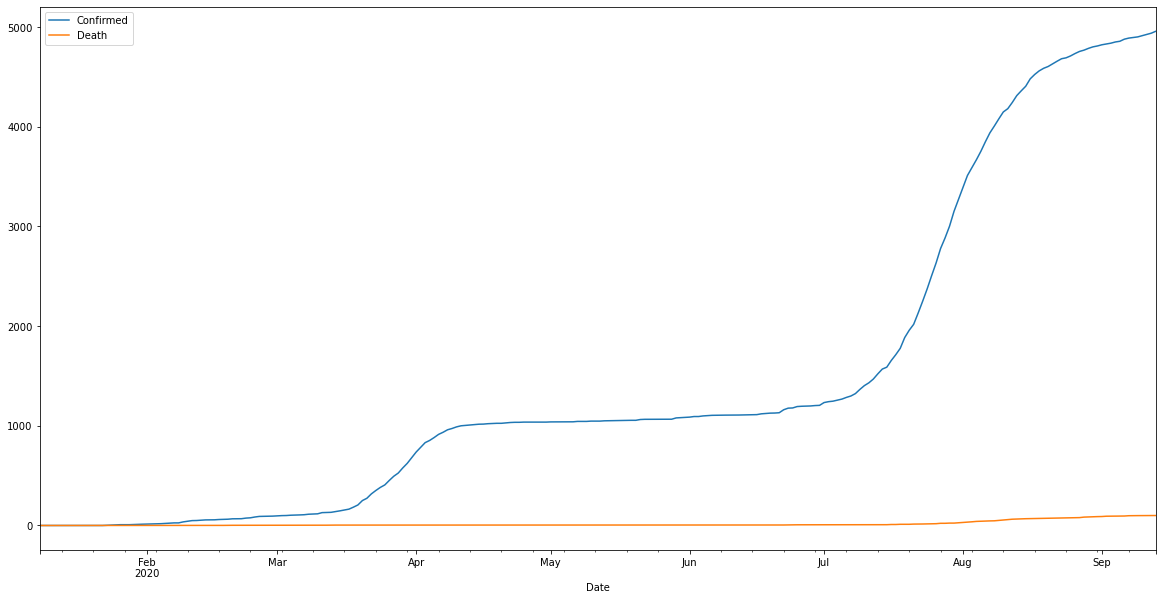

In [9]:
covid_fig = df_covid.plot(figsize = (20,10))
covid_fig.get_figure().savefig("covidcum_hk.png")


In [10]:
len(df_covid.index)

250

In [11]:
df_covid

,Confirmed,Death
Date,,
2020-01-08,0,0
2020-01-09,0,0
2020-01-10,0,0
2020-01-11,0,0
2020-01-12,0,0
...,...,...
2020-09-09,4901,99
2020-09-10,4913,99
2020-09-11,4925,99


In [12]:
df_covid["Confirmed"][1]

0

In [13]:
confirmed_new = []
death_new = []
confirmed_new.append(df_covid["Confirmed"][0])
death_new.append(df_covid["Death"][0])
for n in range(1, len(df_covid.index)):
    confirmed_new.append(df_covid["Confirmed"][n] - df_covid["Confirmed"][n-1])
    death_new.append(df_covid["Death"][n] - df_covid["Death"][n-1])

In [14]:
len(death_new)

250

In [15]:
df_covidnew = pd.DataFrame({"Date": list(df_covid.index), "Confirmed": confirmed_new, "Death": death_new})
df_covidnew

,Date,Confirmed,Death
0,2020-01-08,0,0
1,2020-01-09,0,0
2,2020-01-10,0,0
3,2020-01-11,0,0
4,2020-01-12,0,0
...,...,...,...
245,2020-09-09,6,0
246,2020-09-10,12,0
247,2020-09-11,12,0
248,2020-09-12,13,1


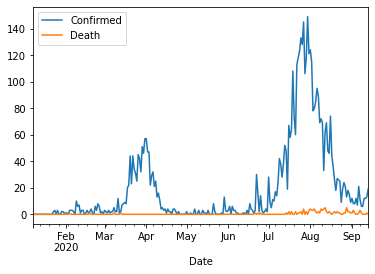

In [16]:
df_covidnew.set_index("Date", inplace=True)
df_covidnew.plot()

In [17]:
import requests

url = "https://covid19-api.org/api/timeline/SG"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)


In [18]:
import json
data_sg = json.loads(response.text.encode('utf8'))
data_sg[0]

{'country': 'SG',
 'last_update': '2020-09-14T07:26:10',
 'cases': 57406,
 'deaths': 27,
 'recovered': 56764}

In [19]:
import pandas as pd
df_covid_sg = pd.DataFrame(data_sg)
df_covid_sg = df_covid_sg[["last_update", "cases", "deaths"]]
df_covid_sg.rename(columns={"last_update": "Date", "cases": "Confirmed", "deaths": "Death"}, inplace=True)
df_covid_sg


,Date,Confirmed,Death
0,2020-09-14T07:26:10,57406,27
1,2020-09-13T23:25:59,57406,27
2,2020-09-12T23:26:14,57357,27
3,2020-09-11T23:32:03,57315,27
4,2020-09-10T23:28:38,57229,27
...,...,...,...
221,2020-01-27T23:59:00,5,0
222,2020-01-26T16:00:00,4,0
223,2020-01-25T17:00:00,3,0
224,2020-01-24T17:00:00,3,0


In [20]:
df_covid_sg['Date'] = pd.to_datetime(df_covid_sg['Date']).dt.strftime('%Y-%m-%d')

In [21]:
df_covid_sg.sort_values(by="Date", inplace=True)
df_covid_sg.set_index("Date", inplace=True)
df_covid_sg

,Confirmed,Death
Date,,
2020-01-23,1,0
2020-01-24,3,0
2020-01-25,3,0
2020-01-26,4,0
2020-01-27,5,0
...,...,...
2020-09-10,57229,27
2020-09-11,57315,27
2020-09-12,57357,27


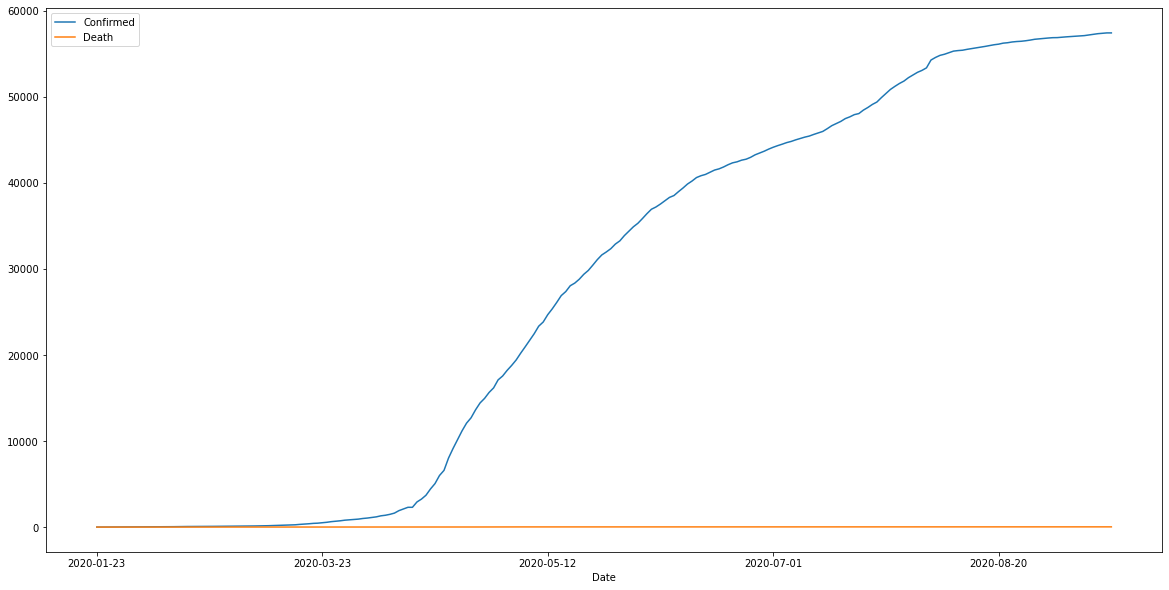

In [22]:
covidcum_sg_fig = df_covid_sg.plot(figsize = (20,10))
covidcum_sg_fig.get_figure().savefig("covidcum_sg.png")

In [23]:
confirmed_new = []
death_new = []
confirmed_new.append(df_covid_sg["Confirmed"][0])
death_new.append(df_covid_sg["Death"][0])
for n in range(1, len(df_covid_sg.index)):
    confirmed_new.append(df_covid_sg["Confirmed"][n] - df_covid_sg["Confirmed"][n-1])
    death_new.append(df_covid_sg["Death"][n] - df_covid_sg["Death"][n-1])

In [24]:
df_covidnew_sg = pd.DataFrame({"Date": list(df_covid_sg.index), "Confirmed": confirmed_new, "Death": death_new})
df_covidnew_sg

,Date,Confirmed,Death
0,2020-01-23,1,0
1,2020-01-24,2,0
2,2020-01-25,0,0
3,2020-01-26,1,0
4,2020-01-27,1,0
...,...,...,...
221,2020-09-10,63,0
222,2020-09-11,86,0
223,2020-09-12,42,0
224,2020-09-13,49,0


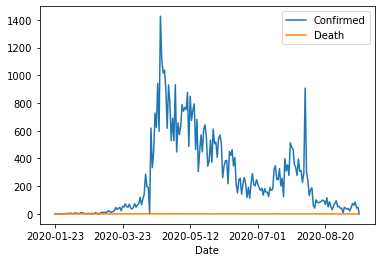

In [25]:
df_covidnew_sg.set_index("Date", inplace=True)
df_covidnew_sg.plot()

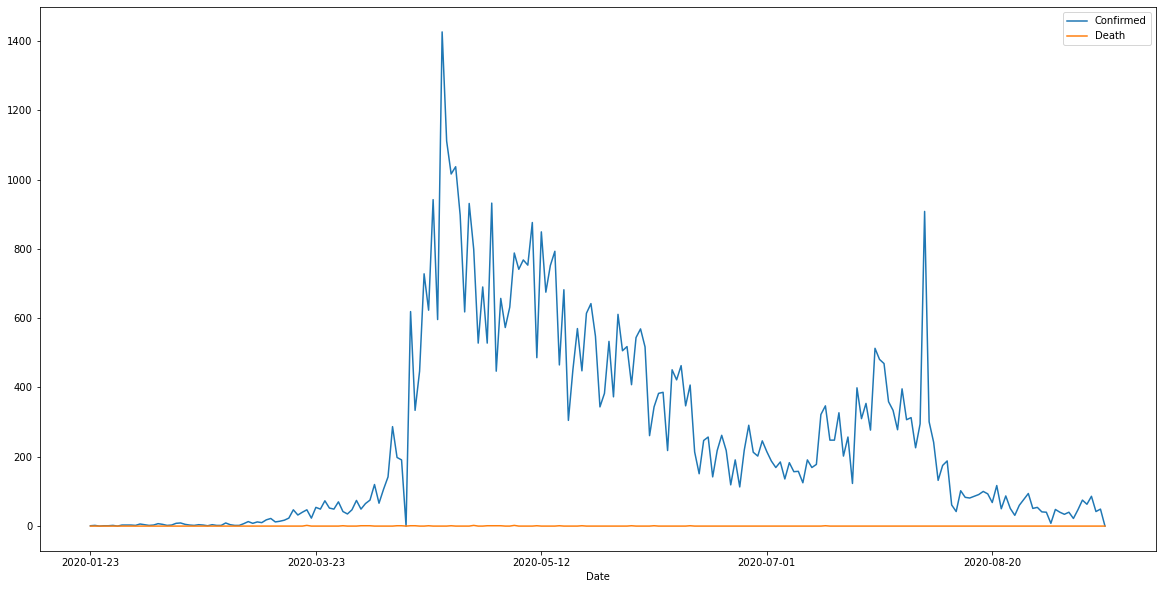

In [26]:
covidnew_sg_fig = df_covidnew_sg.plot(figsize = (20,10))
covidnew_sg_fig.get_figure().savefig("covidnew_sg.png")

In [27]:
import requests

url = "https://covid19-api.org/api/timeline/TW"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)
data_tw = json.loads(response.text.encode('utf8'))

In [28]:
df_covid_tw = pd.DataFrame(data_tw)
df_covid_tw = df_covid_tw[["last_update", "cases", "deaths"]]
df_covid_tw.rename(columns={"last_update": "Date", "cases": "Confirmed", "deaths": "Death"}, inplace=True)

In [29]:
df_covid_tw['Date'] = pd.to_datetime(df_covid_tw['Date']).dt.strftime('%Y-%m-%d')
df_covid_tw.sort_values(by="Date", inplace=True)
df_covid_tw.set_index("Date", inplace=True)

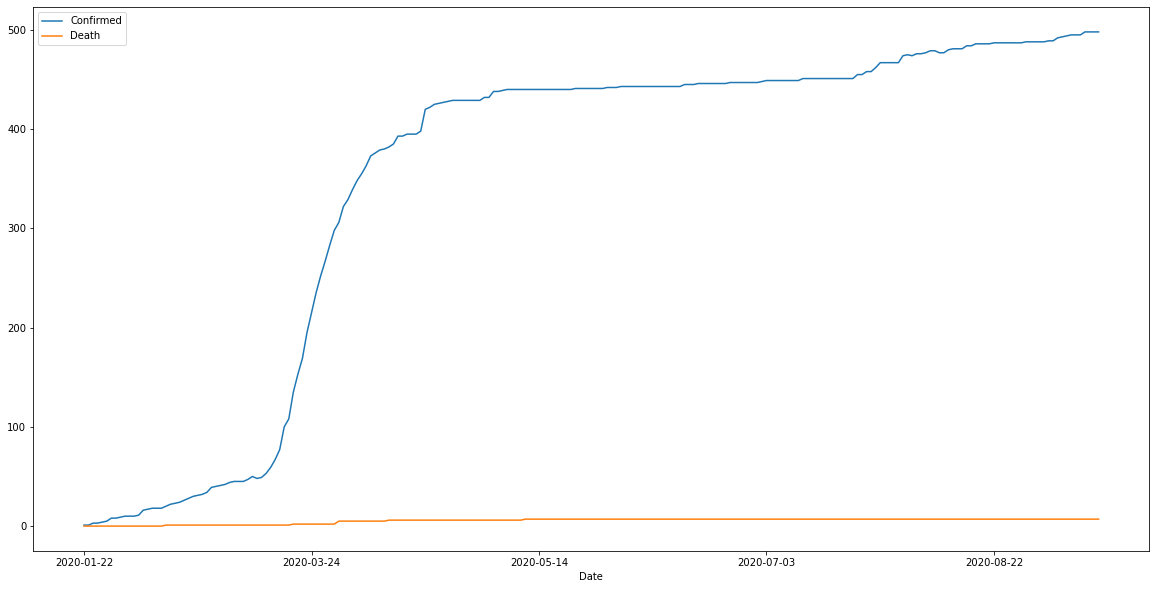

In [30]:
covidcum_tw_fig = df_covid_tw.plot(figsize = (20,10))
covidcum_tw_fig.get_figure().savefig("covidcum_tw.png")

In [31]:
confirmed_new = []
death_new = []
confirmed_new.append(df_covid_tw["Confirmed"][0])
death_new.append(df_covid_tw["Death"][0])
for n in range(1, len(df_covid_tw.index)):
    confirmed_new.append(df_covid_tw["Confirmed"][n] - df_covid_tw["Confirmed"][n-1])
    death_new.append(df_covid_tw["Death"][n] - df_covid_tw["Death"][n-1])

In [32]:
df_covidnew_tw = pd.DataFrame({"Date": list(df_covid_tw.index), "Confirmed": confirmed_new, "Death": death_new})
df_covidnew_tw

,Date,Confirmed,Death
0,2020-01-22,1,0
1,2020-01-23,0,0
2,2020-01-24,2,0
3,2020-01-25,0,0
4,2020-01-26,1,0
...,...,...,...
219,2020-09-10,0,0
220,2020-09-11,3,0
221,2020-09-12,0,0
222,2020-09-13,0,0


In [33]:
url = "https://api.data.gov.hk/v2/filter?q=%7B%22resource%22%3A%22http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv%22%2C%22section%22%3A1%2C%22format%22%3A%22json%22%2C%22sorts%22%3A%5B%5B1%2C%22asc%22%5D%5D%7D"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)url = "https://api.data.gov.hk/v2/filter?q=%7B%22resource%22%3A%22http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv%22%2C%22section%22%3A1%2C%22format%22%3A%22json%22%2C%22sorts%22%3A%5B%5B1%2C%22asc%22%5D%5D%7D"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

SyntaxError: invalid syntax (<ipython-input-33-3a22970c9789>, line 6)

In [34]:
import requests

url = "https://api.data.gov.hk/v2/filter?q=%7B%22resource%22%3A%22http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Fenhanced_sur_covid_19_eng.csv%22%2C%22section%22%3A1%2C%22format%22%3A%22json%22%7D"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

raw_covid_details = json.loads(response.text)

In [35]:
raw_covid_details[0]

{'Case no.': '1',
 'Report date': '23/01/2020',
 'Date of onset': '21/01/2020',
 'Gender': 'M',
 'Age': 39,
 'Name of hospital admitted': '',
 'Hospitalised/Discharged/Deceased': 'Discharged',
 'HK/Non-HK resident': 'Non-HK resident',
 'Case classification*': 'Imported case',
 'Confirmed/probable': 'Confirmed'}

In [36]:
df_covid_details = pd.DataFrame(raw_covid_details)
df_covid_details = df_covid_details[["Report date", "HK/Non-HK resident", "Case classification*"]]
df_covid_details.rename(columns={"Report date": "Date", "HK/Non-HK resident": "HK/Non-HK", "Case classification*": "Classification"}, inplace=True)

In [37]:
df_covid_details

,Date,HK/Non-HK,Classification
0,23/01/2020,Non-HK resident,Imported case
1,23/01/2020,HK resident,Imported case
2,24/01/2020,Non-HK resident,Imported case
3,24/01/2020,Non-HK resident,Imported case
4,24/01/2020,Non-HK resident,Imported case
...,...,...,...
4953,13/09/2020,HK Resident,Imported case
4954,13/09/2020,HK Resident,Imported case
4955,13/09/2020,Unknown,Local case
4956,13/09/2020,HK Resident,Epidemiologically linked with local case


In [38]:
df_covid_details['Date'] = pd.to_datetime(df_covid_details['Date'], dayfirst=True)
df_covid_details.sort_values(by="Date", inplace=True)
df_covid_details.set_index("Date", inplace=True)

In [39]:
df_covid_details["Classification"] = df_covid_details["Classification"].astype("category")

In [40]:
df_covid_details

,HK/Non-HK,Classification
Date,,
2020-01-23,Non-HK resident,Imported case
2020-01-23,HK resident,Imported case
2020-01-24,Non-HK resident,Imported case
2020-01-24,Non-HK resident,Imported case
2020-01-24,Non-HK resident,Imported case
...,...,...
2020-09-13,HK Resident,Epidemiologically linked with local case
2020-09-13,HK Resident,Epidemiologically linked with local case
2020-09-13,HK Resident,Epidemiologically linked with local case


In [41]:
grouped = df_covid_details.groupby(df_covid_details.index)["Classification"].value_counts()

In [42]:
df_covid_details["Classification"].value_counts()

Epidemiologically linked with local case             2213
Local case                                           1349
Imported case                                        1200
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Epidemiologically linked with imported case            31
Name: Classification, dtype: int64

In [43]:
grouped

Date        Classification                             
2020-01-23  Imported case                                  2
2020-01-24  Imported case                                  3
2020-01-26  Imported case                                  3
2020-01-29  Imported case                                  2
2020-01-30  Epidemiologically linked with imported case    1
                                                          ..
2020-09-12  Epidemiologically linked with local case       4
            Imported case                                  4
2020-09-13  Epidemiologically linked with local case       8
            Imported case                                  8
            Local case                                     3
Name: Classification, Length: 473, dtype: int64

In [44]:
list_date = [grouped.index[n][0] for n in range(len(grouped))]
list_class = [grouped.index[n][1] for n in range(len(grouped))]
list_value = [grouped[n] for n in range(len(grouped))]
df_group = pd.DataFrame(list(zip(list_date, list_class, list_value)), columns=["Date", "Classification", "Total"])
df_group

,Date,Classification,Total
0,2020-01-23,Imported case,2
1,2020-01-24,Imported case,3
2,2020-01-26,Imported case,3
3,2020-01-29,Imported case,2
4,2020-01-30,Epidemiologically linked with imported case,1
...,...,...,...
468,2020-09-12,Epidemiologically linked with local case,4
469,2020-09-12,Imported case,4
470,2020-09-13,Epidemiologically linked with local case,8
471,2020-09-13,Imported case,8


In [50]:
df_group["Classification"] = df_group[df_group["Classification"] == "Imported case"]
df_group = df_group.set_index("Date")

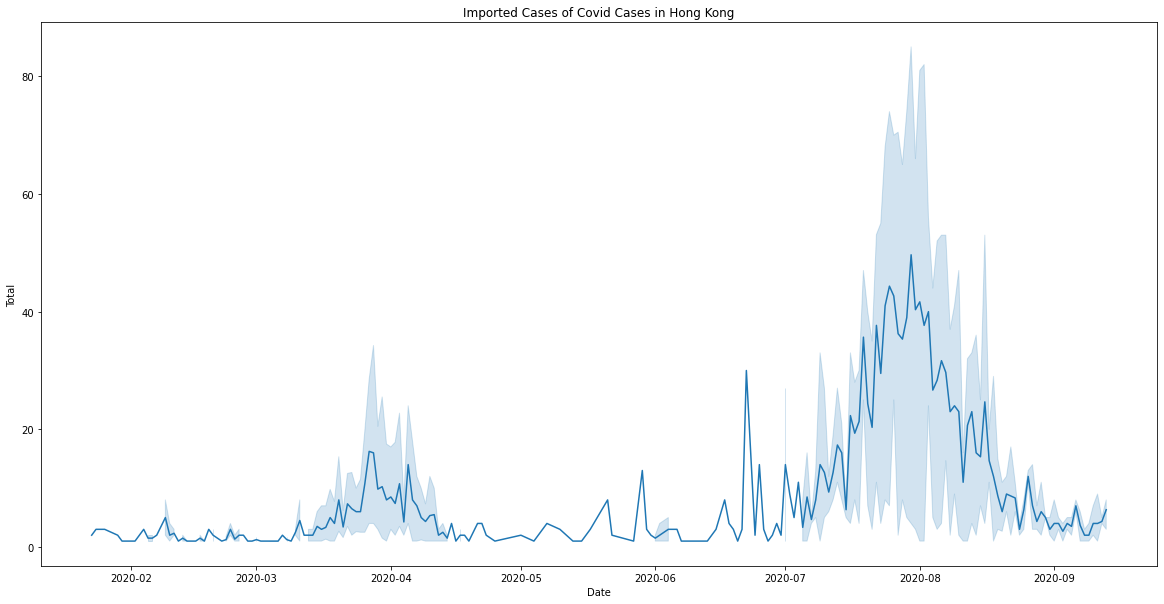

In [51]:
covid_class_imported = sns.lineplot(data = df_group, x = df_group.index, y = df_group["Total"]).set_title("Imported Cases of Covid Cases in Hong Kong")

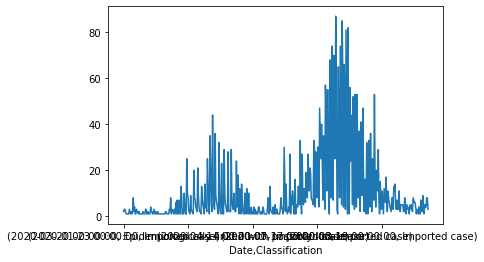

In [45]:
grouped.plot()

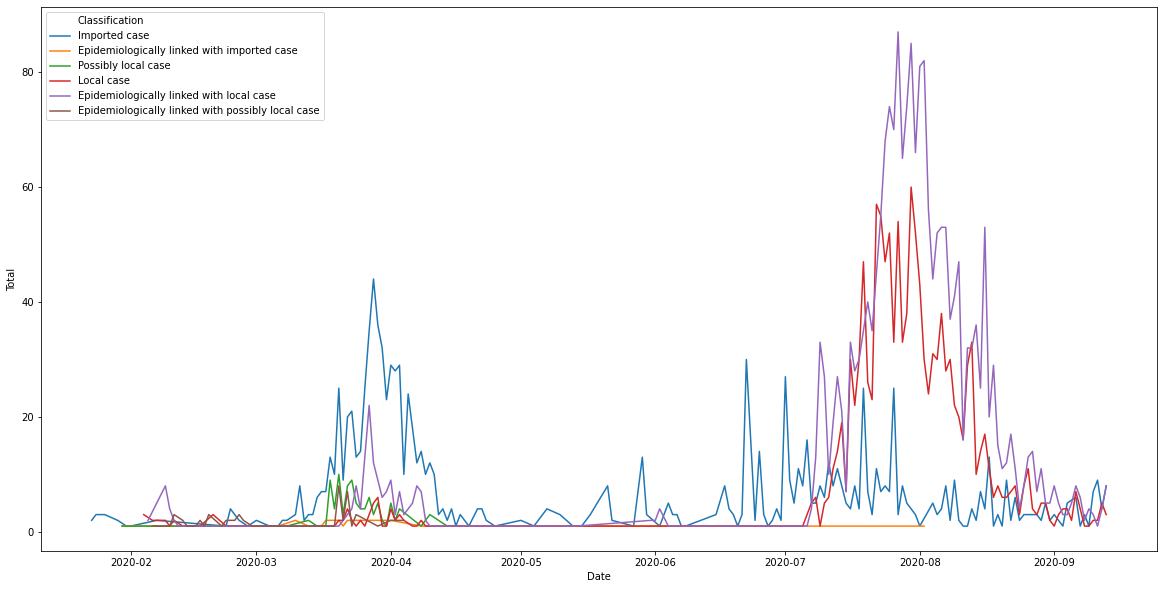

In [46]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] =  20, 10

covid_class = sns.lineplot(x = df_group["Date"], y = df_group["Total"], hue = df_group["Classification"],  )


In [424]:
covid_class.get_xticklabels(),  rotation=45)
xticklabels

Text(737456.0, 0, '')

In [414]:
exceltest = pd.read_csv(r"D:/Users/jacky/Downloads/google_trenddata.csv")

In [415]:
exceltest.drop(columns="Unnamed: 0", inplace=True)

In [420]:
exceltest = exceltest.set_index("Day")

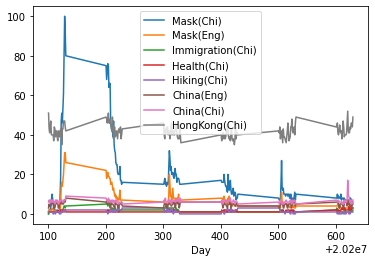

In [421]:
exceltest.plot()

In [59]:
df_covid_details.join(df_covid)

,HK/Non-HK,Classification,Confirmed,Death
Date,,,,
2020-01-23,Non-HK resident,Imported case,2,0
2020-01-23,HK resident,Imported case,2,0
2020-01-24,Non-HK resident,Imported case,5,0
2020-01-24,Non-HK resident,Imported case,5,0
2020-01-24,Non-HK resident,Imported case,5,0
...,...,...,...,...
2020-09-13,HK Resident,Epidemiologically linked with local case,4957,100
2020-09-13,HK Resident,Epidemiologically linked with local case,4957,100
2020-09-13,HK Resident,Epidemiologically linked with local case,4957,100


In [55]:
df_covid_details

,HK/Non-HK,Classification
Date,,
2020-01-23,Non-HK resident,Imported case
2020-01-23,HK resident,Imported case
2020-01-24,Non-HK resident,Imported case
2020-01-24,Non-HK resident,Imported case
2020-01-24,Non-HK resident,Imported case
...,...,...
2020-09-13,HK Resident,Epidemiologically linked with local case
2020-09-13,HK Resident,Epidemiologically linked with local case
2020-09-13,HK Resident,Epidemiologically linked with local case
